In [1]:
import numpy as np

from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import KFold,cross_val_score,train_test_split
import matplotlib.image as Image
import PIL.Image as Image


In [2]:
m_check = ModelCheckpoint("model/epoch200/--{epoch:02d}--{val_loss:.4f}.hdf5", monitor = 'val_loss',save_best_only=True)


In [3]:
x = np.load("../train.npy")
print(x[0])

y = np.load("y.npy")


[[[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.36470588 0.36470588 0.36470588]
  [0.2        0.2        0.2       ]
  ...
  [0.2        0.2        0.2       ]
  [0.36470588 0.36470588 0.36470588]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.18431373 0.18431373 0.18431373]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.18431373 0.18431373 0.18431373]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [0.18431373 0.18431373 0.18431373]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.18431373 0.18431373 0.18431373]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.36470588 0.36470588 0.36470588]


In [4]:
def create_model():
    n = 32
    learn = 5e-4
    opt = optimizers.Adamax(lr=learn)

    
    model = Sequential()
    model.add(Conv2D(n*16,(3,3),padding='same',activation='relu',input_shape=(112,150,3)))
    model.add(Conv2D(n*8,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(n*4,(3,3),padding='same',activation='relu'))
    model.add(Conv2D(n*2,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(n,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))

    model.add(Flatten())
    model.add(Dense(n*4,activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(n*2,activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(9,activation="softmax"))

    model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['acc'])

    return model


In [5]:
seed = np.random.seed(666)

kf = KFold(n_splits=3, shuffle=True,random_state=seed)


In [6]:

x_train,x_test , y_train,y_test = train_test_split(x,y,shuffle=True , random_state=seed)

In [7]:
# history = []
# model = create_model()
# for train_i,test_i in kf.split(x):
#     train_x,train_y = x[train_i],y[train_i]
#     test_x, test_y = x[test_i], y[test_i]

#     hist = model.fit(train_x,train_y,batch_size=30,epochs=50,validation_split=0.25,callbacks=[m_check])
#     history.append(hist)
#     score = model.evaluate(test_x,test_y)
#     print(score)

In [8]:
model = create_model()
# model = load_model("./model/--50--0.1524.hdf5")
history = model.fit(x_train,y_train,batch_size=40,epochs=100,validation_split=0.25,callbacks=[m_check])

Epoch 1/100
64/64 [==============================] - 26s 411ms/step - loss: 1.8837 - acc: 0.2967 - val_loss: 1.6778 - val_acc: 0.5355
Epoch 2/100
64/64 [==============================] - 17s 265ms/step - loss: 1.4991 - acc: 0.4615 - val_loss: 1.4058 - val_acc: 0.6505
Epoch 3/100
64/64 [==============================] - 17s 265ms/step - loss: 1.2724 - acc: 0.5429 - val_loss: 1.3394 - val_acc: 0.7239
Epoch 4/100
64/64 [==============================] - 17s 266ms/step - loss: 1.0995 - acc: 0.6136 - val_loss: 1.1320 - val_acc: 0.7867
Epoch 5/100
64/64 [==============================] - 17s 260ms/step - loss: 0.9297 - acc: 0.6653 - val_loss: 0.9494 - val_acc: 0.8412
Epoch 6/100
64/64 [==============================] - 17s 261ms/step - loss: 0.7589 - acc: 0.7254 - val_loss: 0.7910 - val_acc: 0.8922
Epoch 7/100
64/64 [==============================] - 17s 261ms/step - loss: 0.6076 - acc: 0.7894 - val_loss: 0.5508 - val_acc: 0.9111
Epoch 8/100
64/64 [==============================] - 16s 254ms

In [9]:
predy = model.evaluate(x_test,y_test)
print(predy)

36/36 [==============================] - 2s 67ms/step - loss: 0.0709 - acc: 0.9858
[0.0708967000246048, 0.9857777953147888]


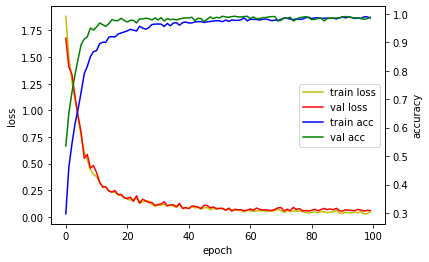

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

hist = history

line1= loss_ax.plot(hist.history['loss'], 'y', label='train loss')
line2= loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
line3= acc_ax.plot(hist.history['acc'], 'b', label='train acc')
line4= acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
lines = line1+line2+line3+line4
labels = [l.get_label() for l in lines]
acc_ax.set_ylabel('accuracy')
acc_ax.legend(lines,labels,loc='center right')


plt.show()